# **Linear Regression with Python Scikit Learn - Task 1**

There are two types of supervised machine learning algorithms: Regression and classification. The former predicts continuous value outputs while the latter predicts discrete outputs. For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is malignant or benign is a classification problem.

The term "linearity" in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.

**TASK 1- Predict the percentage of an student based on the no. of study hours.**

## **Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# First, we need to import all libraries required in this notebook. 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from the link provided and as it is in CSV format we can directly import it with the help of the Pandas Library.
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data is imported successfully")
#This print message is optional and I use it to make the code understandable to everyone.

Data is imported successfully


In [3]:
#Now, we need to have a look at the data which we imported. For that we can print the first 10 element rows of the data.
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on bar graph and see if we can find any relationship between the data. We can create the graph with the following code:

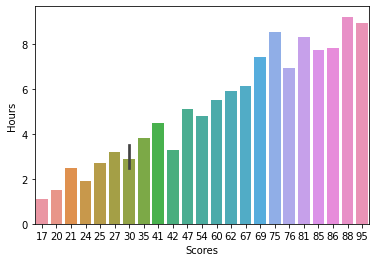

In [4]:
sns.barplot(y='Hours',x='Scores',data=data);

From the graph above, we can clearly see that there is a positive relation between the number of hours studied and percentage of score.

## **Now, we need to prepare the data in input and output labels.**

In [5]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

Now, we have to split the data in training and test sets and for that we use the train test splitter by Sci-kit learn.

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

test_size= 0.2 means what we are splitting the data in 80/20 size where 80% of the data will be used in training and 20% in testing.

# Now, training the algorithm.

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training is complete.")

Training is complete.


We used Linear Regression Algorithm for training the model.

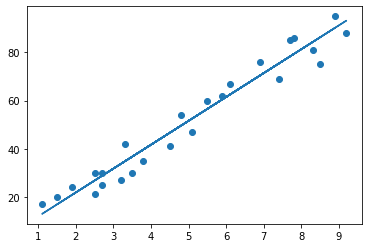

In [8]:
# Plotting the regression line which will tell us the approx results for our model.
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

The closer the values, the better is the model.

# **Now, as we have trained the model, it's time for some predictions.**

In [9]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted score
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now, we can see that the predicted values are close or kind of similar to our actual values. Hence we can say that predictions are true for this small piece of data. We can evaulate our model


In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982


In [12]:
#Let's check the accuracy of our model. For that we need to check it on the data that is unknown i.e test data.
regressor.score(X_test, Y_test)

0.9454906892105354

Since, our model gives a score of 0.945. It means that we have an accuracy of 94.5% which is okay...

In [14]:
#Now we need a prediction for if a student studies for 9.25 hours as per the given task.
hours = 9.25
predicted_score = regressor.predict((np.array(hours).reshape(1,1)))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predicted_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
